In [73]:
from deap import tools, base, creator, algorithms
import random as rnd
import numpy as np
# from function_opt.ga_scheme import eaMuPlusLambda

from function_opt.draw_log import draw_log
from function_opt.draw_log import draw_queens_on_desk

creator.create("Fitness", base.Fitness, weights=(1.0,))
creator.create("ChessDesk", set, fitness=creator.Fitness)


c:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'ChessDesk' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [74]:


def count_line_value_with_step(init_idx: int, step: int, chess_desk) -> int:
    idx = init_idx
    queens_number = len(chess_desk)
    positions_num = queens_number**2
    per_line_value = 0

    while idx < positions_num: # Check vertical borders
        # print("item_idx:", idx)
        if idx in chess_desk:
            per_line_value = per_line_value + 1
            # print("add +1")

        if step == (queens_number + 1): # For main diag
            if idx % queens_number == (queens_number - 1):
                break

        if step == (queens_number - 1): # For secondary diag
            if idx % queens_number == 0:
                break

        if step == 1: # For horizontal
            if idx % queens_number == (queens_number - 1):
                break
        
        idx = idx + step

    return per_line_value**2

def count_horizontal_value(chess_desk) -> int:
    # Horizontal lines
    horizontal_value = 0
    horizontal_step = 1
    queens_number = len(chess_desk)

    for row_idx in range(queens_number):
        horizontal_value = horizontal_value + count_line_value_with_step(row_idx*queens_number, horizontal_step, chess_desk) # In order to show that more than 1 item in row is bad
    
    return horizontal_value

def count_vertical_value(chess_desk) -> int:
    # Vertical
    vertical_value = 0
    queens_number = len(chess_desk)
    vertical_step = queens_number

    for col_idx in range(queens_number):
        vertical_value = vertical_value + count_line_value_with_step(col_idx, vertical_step, chess_desk) # In order to show that more than 1 item in row is bad

    return vertical_value

def count_main_diagonal_value(chess_desk) -> int:
    # Main diag
    m_diag_value = 0
    queens_number = len(chess_desk)
    m_diag_step = queens_number + 1

    for col_idx in range(0, queens_number):
        m_diag_value = m_diag_value + count_line_value_with_step(col_idx, m_diag_step, chess_desk) # In order to show that more than 1 item in row is bad
    for row_idx in range(1, queens_number):
        m_diag_value = m_diag_value + count_line_value_with_step(row_idx*queens_number, m_diag_step, chess_desk) # In order to show that more than 1 item in row is bad

    return m_diag_value

def count_secondary_diagonal_value(chess_desk) -> int:
    # Secondary diag
    s_diag_value = 0
    queens_number = len(chess_desk)
    s_diag_step = queens_number - 1

    for col_idx in range(0, queens_number):
        s_diag_value = s_diag_value + count_line_value_with_step(col_idx, s_diag_step, chess_desk) # In order to show that more than 1 item in row is bad
    for row_idx in range(1, queens_number):
        s_diag_value = s_diag_value + count_line_value_with_step(row_idx*queens_number+(queens_number-1), s_diag_step, chess_desk) # In order to show that more than 1 item in row is bad

    return s_diag_value

def fitness(chess_desk):
    value: float = count_horizontal_value(chess_desk) + \
        count_vertical_value(chess_desk) + \
        count_main_diagonal_value(chess_desk) + \
        count_secondary_diagonal_value(chess_desk)
    return 1 / value 



N = 5
# All horizontal
tmp_chess_desk = {i+N for i in range(N)}
# All vertical
# tmp_chess_desk = {i*N+4 for i in range(N)}
# All main diag
# tmp_chess_desk = {i*N+i for i in range(N)}
# All secondary diag
# tmp_chess_desk = {i*(N-1)+(N-1) for i in range(N)}

print("horizontal_value", count_horizontal_value(tmp_chess_desk))

print("vertical_value", count_vertical_value(tmp_chess_desk))

print("m_diag_value", count_main_diagonal_value(tmp_chess_desk))

print("s_diag_value", count_secondary_diagonal_value(tmp_chess_desk))

print(fitness(tmp_chess_desk))

horizontal_value 25
vertical_value 5
m_diag_value 5
s_diag_value 5
0.025


In [75]:
def crossover(chess_desk_1, chess_desk_2):
    child_1 = set()
    child_2 = set()
    concat_chess_desk = []

    for item in chess_desk_1:
        concat_chess_desk.append(item)
    
    for item in chess_desk_2:
        concat_chess_desk.append(item)

    concat_chess_desk = sorted(concat_chess_desk)

    for idx in range(0, len(concat_chess_desk), 2):
        child_1.add(concat_chess_desk[idx])
        child_2.add(concat_chess_desk[idx+1])

    return child_1, child_2



# All horizontal
hor_chess_desk = {i for i in range(N)}
# All vertical
ver_chess_desk = {i*N for i in range(N)}
# All main diag
mdiag_chess_desk = {i*N+i for i in range(N)}
# All secondary diag
sdiag_chess_desk = {i*(N-1)+(N-1) for i in range(N)}

print(hor_chess_desk)
print(mdiag_chess_desk)

res1,res2 = crossover(hor_chess_desk, mdiag_chess_desk)
print(res1)
print(res2)

{0, 1, 2, 3, 4}
{0, 6, 12, 18, 24}
{0, 1, 3, 6, 18}
{0, 2, 4, 12, 24}


In [76]:
# Mutation
def get_random_from_desk(chess_desk) -> int:
    queens_number = len(chess_desk)
    while True:
        position = rnd.randint(0, queens_number**2 - 1)
        if not position in chess_desk:
            break
    return rnd.choice(tuple(chess_desk)), position

def get_mutations_number(chess_desk) -> int:
    queens_number: int = len(chess_desk)
    max_number_of_mutations = queens_number // 10 + 1
    min_number_of_mutations = 1
    return rnd.randint(min_number_of_mutations, max_number_of_mutations)

def mutation(chess_desk):
    for mitation in range(get_mutations_number(chess_desk)):
        position_to_remove, position_to_add = get_random_from_desk(chess_desk)

        chess_desk.remove(position_to_remove)
        chess_desk.add(position_to_add)

    return chess_desk


print(hor_chess_desk)
print(mdiag_chess_desk)

print(mutation(hor_chess_desk))
print(mutation(mdiag_chess_desk))

{0, 1, 2, 3, 4}
{0, 6, 12, 18, 24}
{0, 1, 3, 4, 18}
{0, 6, 12, 15, 18}


In [77]:

class QueenProblem:
    def factory(self):
        # create individ
        chess_desk = set()
        for _ in range(self.queen_number):
            while True:
                position = rnd.choice(self.initial_queen_pool)
                if not position in chess_desk: # Add only unique
                    chess_desk.add(position)
                    break
        chess_desk = creator.ChessDesk(chess_desk)
        return chess_desk

    def fitness(self, chess_desk):
        return fitness(chess_desk),

    def mutation(self, mutant):
        return mutation(mutant),

    def crossover(self, b1, b2):
        c1, c2 = crossover(b1, b2)
        return creator.ChessDesk(c1), creator.ChessDesk(c2)


    def __init__(self, queen_number, iteration_num, popul_size):
        self.initial_queen_pool = [i for i in range(queen_number**2)]

        # factory
        self.queen_number = queen_number
        self.iteration_num = iteration_num
        self.popul_size = popul_size

        self.engine = base.Toolbox()
        self.engine.register("individual", self.factory)
        # need popsize here?
        self.engine.register("population", tools.initRepeat, list, self.engine.individual)
        self.engine.register("mutate", self.mutation)
        self.engine.register("mate", self.crossover)
        # self.engine.register("select", tools.selNSGA2)
        # self.engine.register("select", tools.selRoulette)
        self.engine.register("select",tools.selTournament, tournsize=10)
        
        self.engine.register("evaluate", self.fitness)

    def run(self):
        pop_size = self.popul_size
        iterations = self.iteration_num

        pop = self.engine.population(pop_size)
        hof = tools.HallOfFame(5)
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean, axis=0)
        stats.register("std", np.std, axis=0)
        stats.register("min", np.min, axis=0)
        stats.register("max", np.max, axis=0)

        pop, log = algorithms.eaMuPlusLambda(pop, self.engine, mu=pop_size, lambda_=int(pop_size*0.5),
                                  cxpb=0.2, mutpb=0.8, stats=stats, halloffame=hof, ngen=iterations)

        print("Best = {}".format(hof[0]))
        print("Best fit = {}".format(hof[0].fitness.values[0]))

        return pop, log, hof[0]


In [78]:
def solve_queen_problem(queen_number: int):
    queen_number = queen_number
    # rnd.seed(10)
    population_size = queen_number**2 * 5
    iteration_number = queen_number**2 * 5

    while True:
        problem = QueenProblem(queen_number = queen_number, iteration_num=iteration_number, popul_size=population_size)
        pop, log, best_desk = problem.run()

        # If we reach tha max fitness falue tha problem is colved
        if best_desk.fitness.values[0] == (1 / (4 * queen_number)):
            print(f"Queen problem with {queen_number} queens is solved")
            break

    return pop, log, best_desk


gen	nevals	avg         	std        	min         	max         
0  	1125  	[0.00974074]	[0.0007403]	[0.00757576]	[0.01190476]
1  	562   	[0.01092726]	[0.00046876]	[0.00980392]	[0.0125]    
2  	562   	[0.01170685]	[0.00038809]	[0.01086957]	[0.01282051]
3  	562   	[0.01229886]	[0.00026934]	[0.01162791]	[0.01282051]
4  	562   	[0.0126205] 	[0.00017675]	[0.01190476]	[0.01315789]
5  	562   	[0.01286731]	[0.00015822]	[0.0125]    	[0.01315789]
6  	562   	[0.01309434]	[0.00014759]	[0.01282051]	[0.01351351]
7  	562   	[0.0132199] 	[0.00013762]	[0.01315789]	[0.01388889]
8  	562   	[0.01343725]	[0.00019468]	[0.01315789]	[0.01428571]
9  	562   	[0.01363845]	[0.00020688]	[0.01282051]	[0.01428571]
10 	562   	[0.01394345]	[0.00022527]	[0.01351351]	[0.01470588]
11 	562   	[0.01424455]	[0.00017813]	[0.01388889]	[0.01470588]
12 	562   	[0.0144254] 	[0.00019794]	[0.01428571]	[0.01470588]
13 	562   	[0.01467339]	[0.00011224]	[0.01428571]	[0.01470588]
14 	562   	[0.01470588]	[0.]        	[0.01470588]	[0.0147

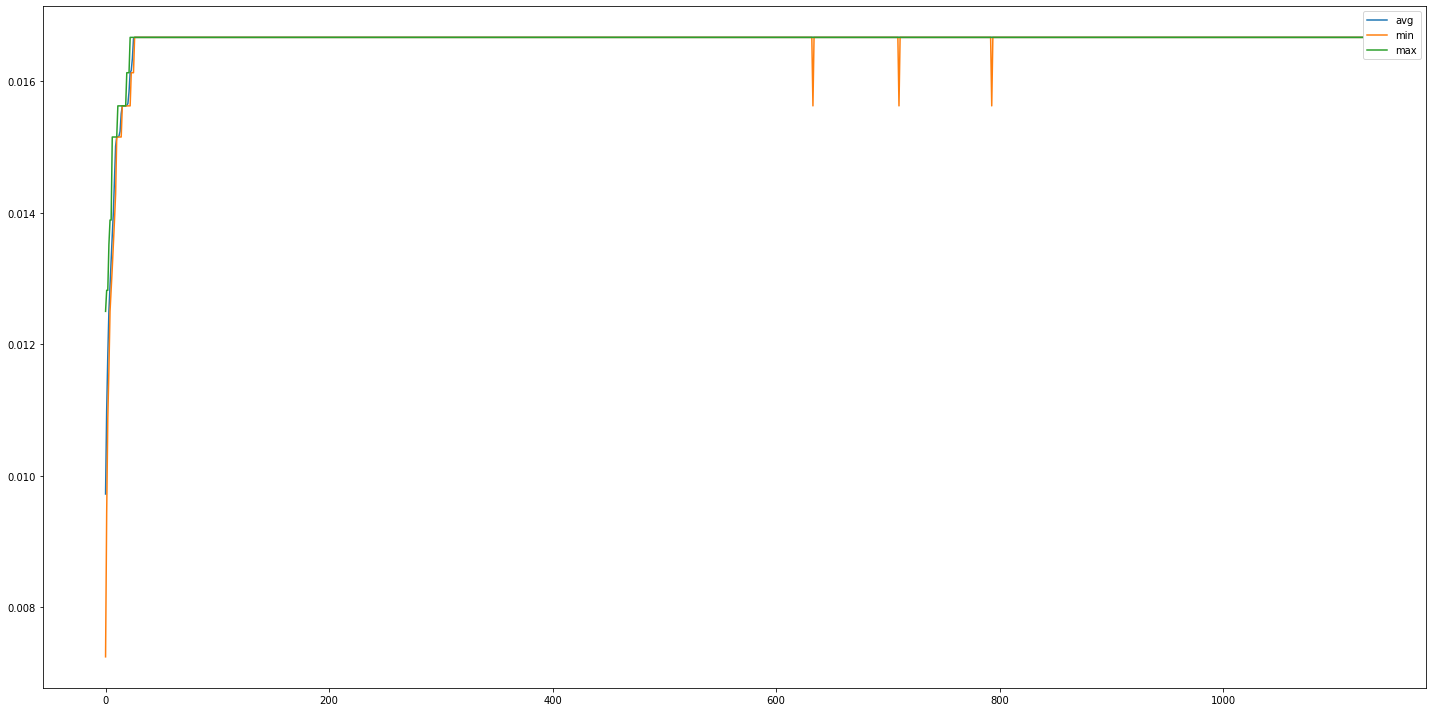

In [79]:
pop,log, desk = solve_queen_problem(queen_number = 15)

draw_log(log)

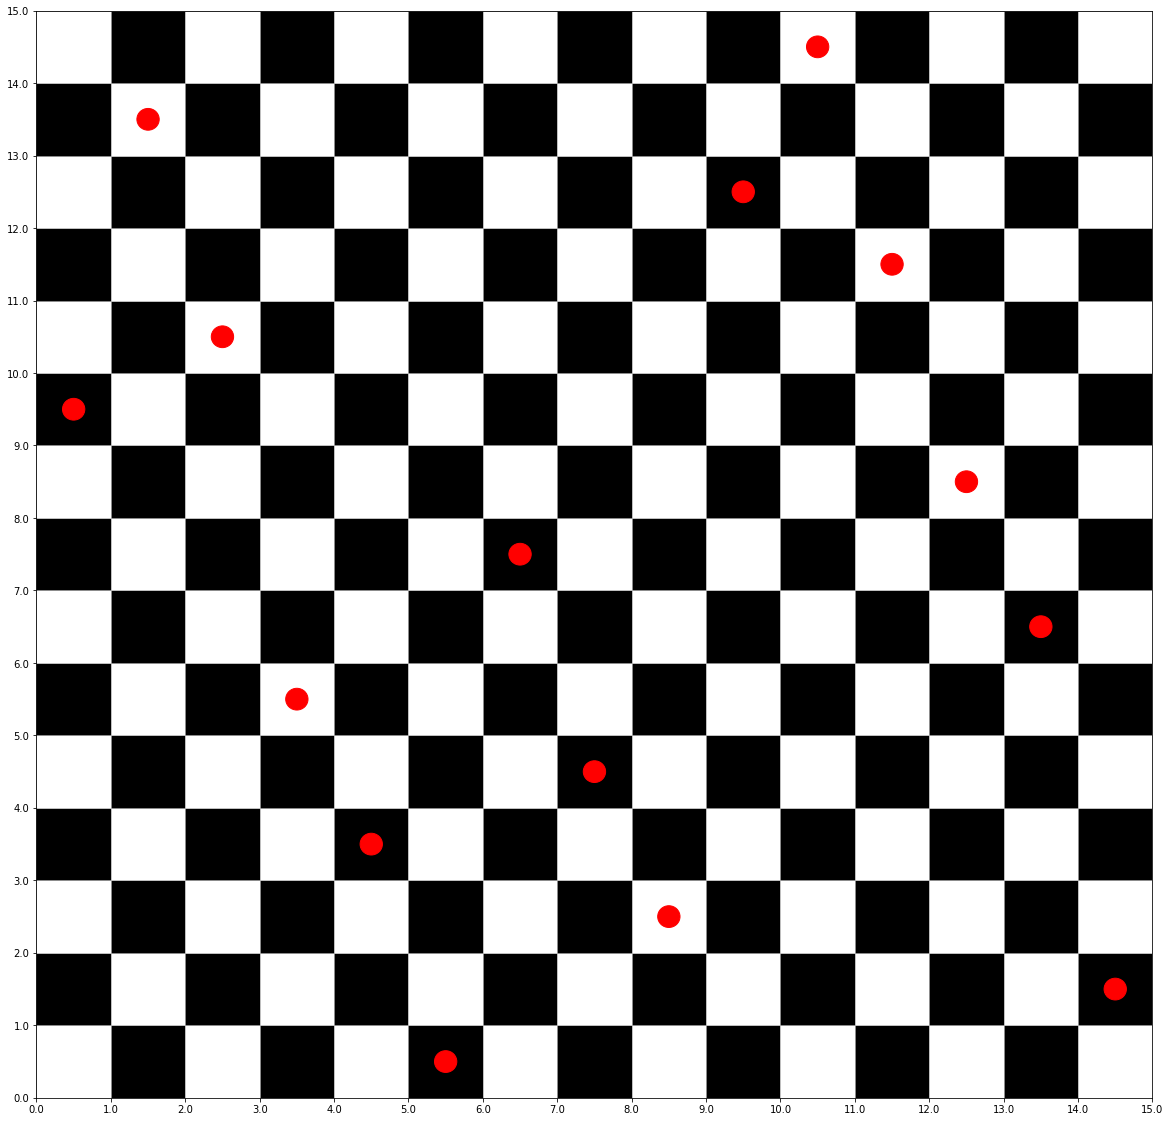

In [80]:
draw_queens_on_desk(desk)

gen	nevals	avg         	std         	min         	max         
0  	320   	[0.01911925]	[0.00162834]	[0.01470588]	[0.02380952]
1  	160   	[0.02167789]	[0.00091582]	[0.01923077]	[0.02380952]
2  	160   	[0.02333297]	[0.00102989]	[0.02173913]	[0.02631579]
3  	160   	[0.02498608]	[0.00100788]	[0.02272727]	[0.02631579]
4  	160   	[0.02624406]	[0.00039075]	[0.025]     	[0.02777778]
5  	160   	[0.02656707]	[0.00055157]	[0.02631579]	[0.02777778]
6  	160   	[0.027419]  	[0.00067753]	[0.02631579]	[0.02941176]
7  	160   	[0.02794118]	[0.0004902] 	[0.02777778]	[0.02941176]
8  	160   	[0.02863051]	[0.00081621]	[0.02777778]	[0.02941176]
9  	160   	[0.02939134]	[0.00018154]	[0.02777778]	[0.02941176]
10 	160   	[0.02941176]	[0.]        	[0.02941176]	[0.02941176]
11 	160   	[0.02941176]	[0.]        	[0.02941176]	[0.02941176]
12 	160   	[0.02941176]	[0.]        	[0.02941176]	[0.02941176]
13 	160   	[0.02941176]	[0.]        	[0.02941176]	[0.02941176]
14 	160   	[0.02941176]	[0.]        	[0.02941176]	[0.02

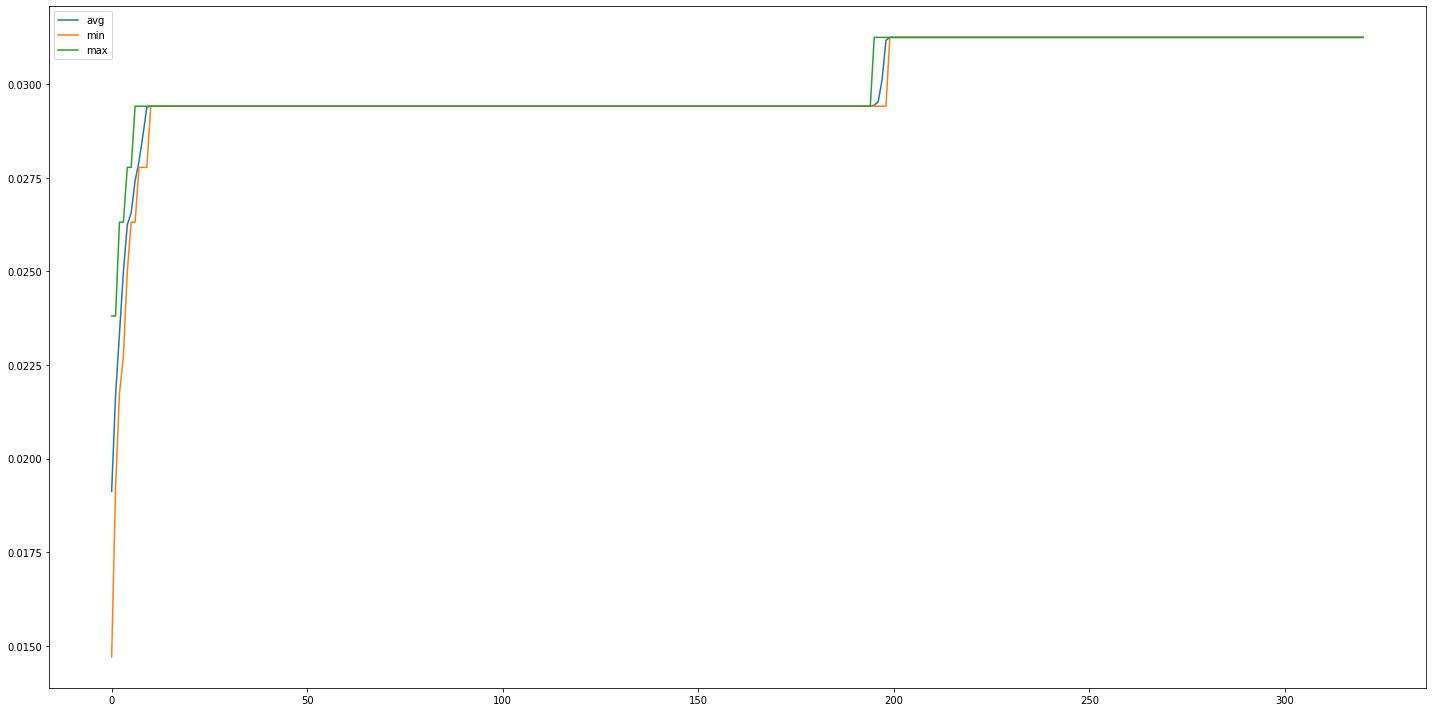

In [81]:
pop,log, desk = solve_queen_problem(queen_number = 8)

draw_log(log)


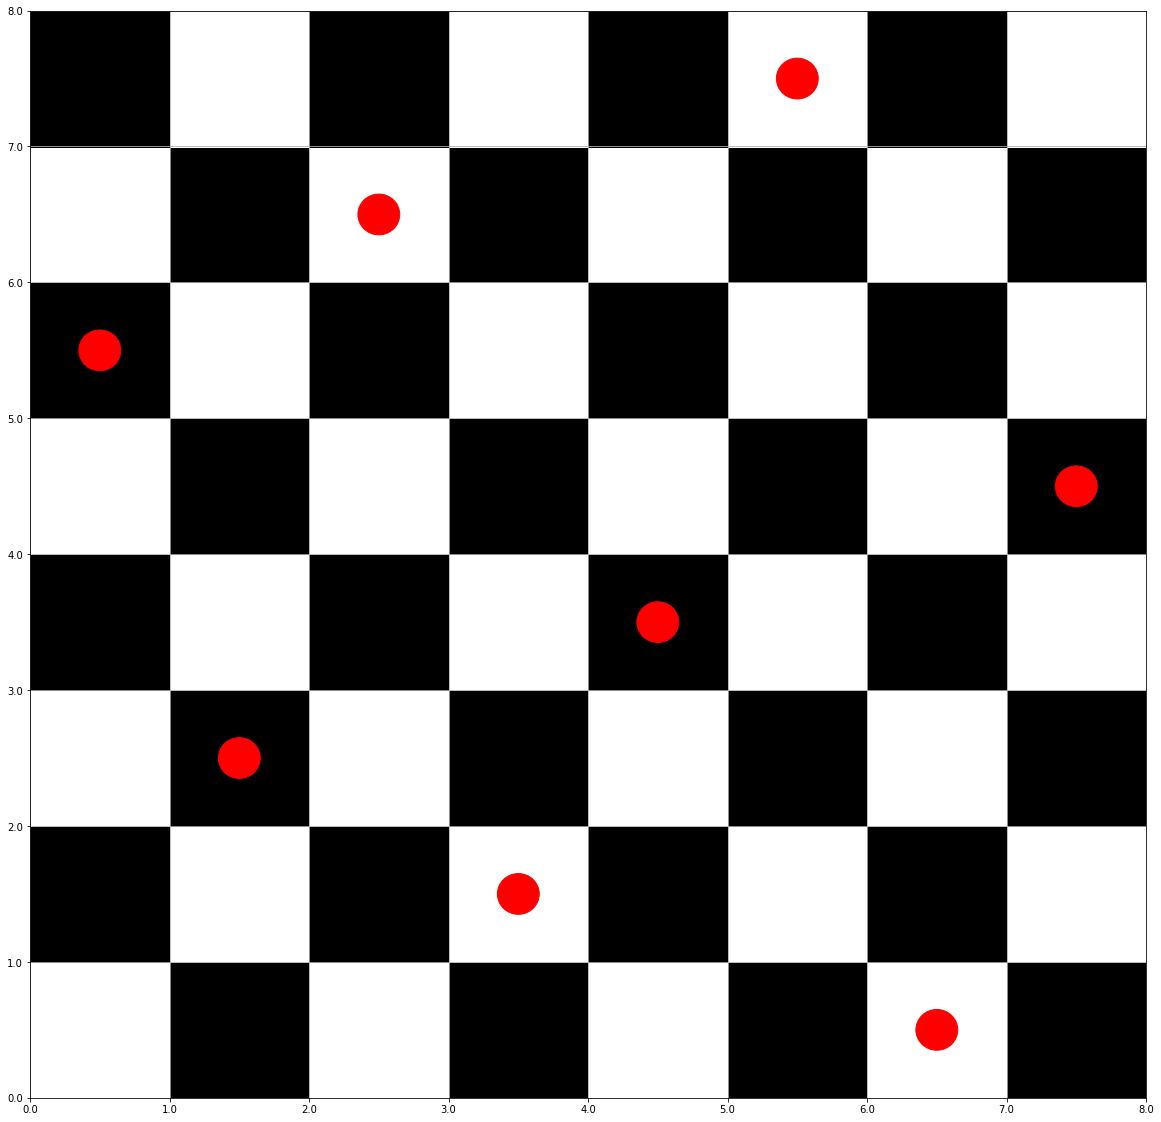

In [82]:
draw_queens_on_desk(desk)